### sktime 予測
https://github.com/alan-turing-institute/sktime/blob/master/examples/01_forecasting.ipynb

### 気象庁データダウンロード
https://www.data.jma.go.jp/gmd/risk/obsdl/index.php  

### Pandasのread_csvをした際にある列をdatetimeとして読み込む  
https://qiita.com/tackey/items/5cc9d26ee4aa3ad69d58  

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import datetime

from IPython.display import display

from sktime.forecasting.model_selection import temporal_train_test_split

# ナイーブベイズ
from sktime.forecasting.naive import NaiveForecaster

%matplotlib inline

from sklearn.metrics import r2_score

In [2]:
from fbprophet import Prophet

Importing plotly failed. Interactive plots will not work.


### 読み込みデータ作成

In [3]:
path = os.getcwd()

##### Prophet用にカラムを設定　ds：日付カラム　y：予測対象カラム．

In [4]:
df = pd.read_csv(path + "\data.csv", encoding="shift-jis", usecols=[0,1], names=["ds", "y"], header=2)
df = df.drop(index=0, axis=0)
df["ds"] = pd.to_datetime(df["ds"])

In [5]:
display(df.head())
display(df.tail())
display(len(df))
display(df.dtypes)
display(type(df))

,ds,y
1,1990-01-01,5.2
2,1990-01-02,5.5
3,1990-01-03,5.8
4,1990-01-04,5.7
5,1990-01-05,6.8


,ds,y
10953,2019-12-27,8.7
10954,2019-12-28,6.8
10955,2019-12-29,7.0
10956,2019-12-30,6.7
10957,2019-12-31,8.2


10957

ds    datetime64[ns]
y            float64
dtype: object

pandas.core.frame.DataFrame

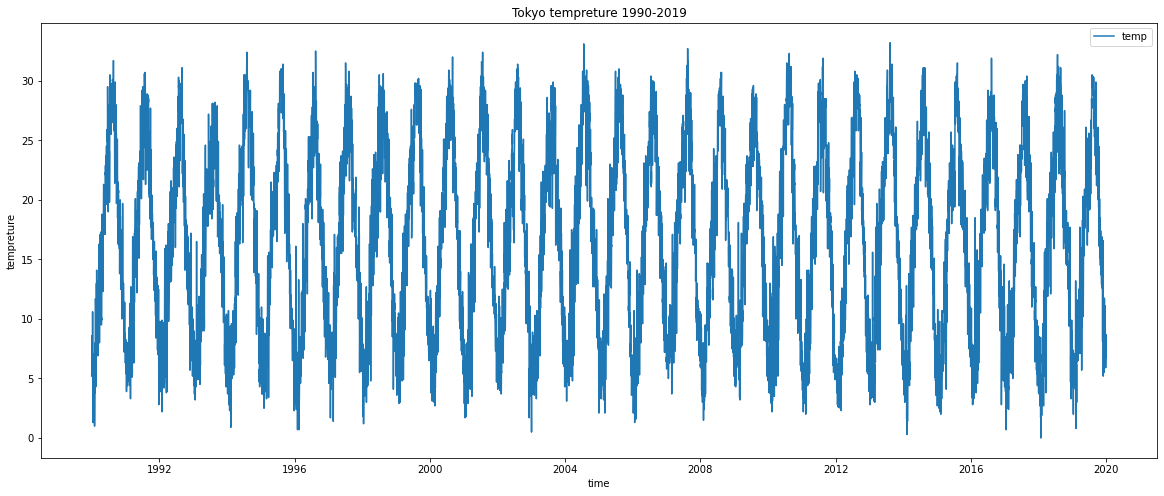

In [6]:
fig = plt.figure(figsize=(20, 8))

plt.title("Tokyo tempreture 1990-2019")
plt.xlabel("time")
plt.ylabel("tempreture")

plt.plot(df["ds"], df["y"], label="temp")
plt.legend()
plt.show()

### ホールドアウト法

In [7]:
y_train, y_test = temporal_train_test_split(df, test_size=365)
print(y_train.shape[0], y_test.shape[0])

10592 365


In [8]:
display(y_test.head())
display(y_test.tail())
display(len(y_test))

,ds,y
10593,2019-01-01,5.3
10594,2019-01-02,6.2
10595,2019-01-03,4.9
10596,2019-01-04,5.1
10597,2019-01-05,7.4


,ds,y
10953,2019-12-27,8.7
10954,2019-12-28,6.8
10955,2019-12-29,7.0
10956,2019-12-30,6.7
10957,2019-12-31,8.2


365

### Propeht

In [9]:
model_pro = Prophet(weekly_seasonality=True, yearly_seasonality=True, daily_seasonality=True)

In [10]:
model_pro.fit(y_train)

In [11]:
forecast_pro = model_pro.predict(y_test)
forecast_pro.index = range(10593,10958)

### sktime ナイーブベイズによる予測

In [12]:
fh = np.arange(len(y_test))+1

In [13]:
model_sk = NaiveForecaster(strategy="seasonal_last", sp=365)
model_sk.fit(y_train["y"])
forecast_sk = model_sk.predict(fh)

### グラフ表示

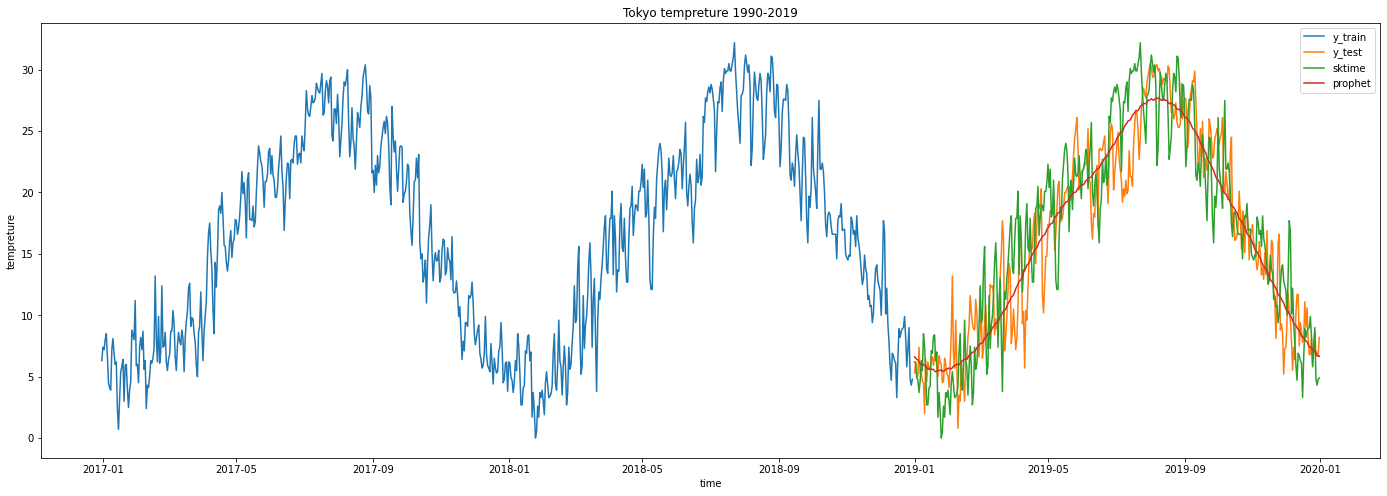

In [14]:
fig = plt.figure(figsize=(24, 8))

plt.plot(y_train["ds"][-731:-1], y_train["y"][-731:-1], label="y_train")
plt.plot(y_test["ds"], y_test["y"], label="y_test")
plt.plot(y_test["ds"], forecast_sk, label="sktime")
plt.plot(y_test["ds"], forecast_pro["yhat"], label="prophet")

plt.title("Tokyo tempreture 1990-2019")
plt.xlabel("time")
plt.ylabel("tempreture")

plt.legend()
plt.show()

In [15]:
print("Prophet 決定係数:{}".format(r2_score(y_test["y"], forecast_pro["yhat"])))

print("sktime  決定係数:{}".format(r2_score(y_test["y"], forecast_sk)))

Prophet 決定係数:0.8988778410877211
sktime  決定係数:0.7408533090595817
